Using a single hidden layer

In [ ]:
import tensorflow as tf
import keras
from keras.datasets import mnist
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [113]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [114]:
print(x_train.shape)
print(y_train.shape)

(60000, 28, 28)
(60000,)


We can see there are 42000 images in this dataset

As we can see the first column contains the digit/label

In [115]:
print(x_test.shape)
print(y_test.shape)

(10000, 28, 28)
(10000,)


All the images are flattend in 784 pixels

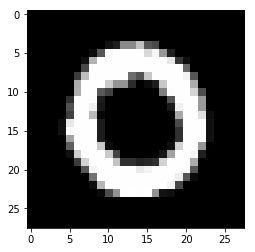

In [116]:
plt.imshow(X_train[1], cmap=plt.get_cmap('gray'))

In [117]:
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255


To plot the image we reshape the matrix

Normalizing the dataset

In [118]:
#y_train = keras.utils.np_utils.to_categorical(y_train)
#y_test = keras.utils.np_utils.to_categorical(y_test)

Training my first model

In [119]:
import tensorflow as tf
from tensorflow import keras


model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(128, tf.nn.relu),
    keras.layers.Dense(10, tf.nn.softmax)
])

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_9 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_18 (Dense)             (None, 128)               100480    
_________________________________________________________________
dense_19 (Dense)             (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [120]:
model.compile(optimizer=tf.train.AdamOptimizer(),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy']
             )

In [121]:
model.fit(x_train,
         y_train,
         batch_size=64,
         epochs=2,
         validation_data=(x_train, y_train),
         )

Train on 60000 samples, validate on 60000 samples
Epoch 1/2
60000/60000 [==============================] - 4s 68us/step - loss: 0.2992 - acc: 0.9162 - val_loss: 0.1572 - val_acc: 0.9544
Epoch 2/2
60000/60000 [==============================] - 5s 87us/step - loss: 0.1302 - acc: 0.9622 - val_loss: 0.0936 - val_acc: 0.9733


In [122]:
test_loss, test_acc=model.evaluate(x_test, y_test)

60000/60000 [==============================] - 2s 30us/step


In [123]:
print(test_acc)

0.9733166666666667
